<h1> experiment ideas : </h1>
<h3>
    <ol>
        <li> you saw that KNN is able to match similarities in orientation as well , which is not technically a class-specific descriptor. Now isolate class specific information, and intra-class differentiators like orientation information. 
        </li>
    </ol>    
</h3>

<h1> SETUP </h1>

In [1]:
import torch
import os
import cv2
import supervision as sv
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import cv2

from groundingdino.util.inference import Model

import sys

def include_utils():
    parent_directory = os.path.abspath('/app/utils')
    sys.path.append(parent_directory)

include_utils()

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

from utils.gdsr_utils import check_model_paths

check_model_paths()


ModuleNotFoundError: No module named 'supervision'

# YOLO EMBEDDINGS NEAREST NEIGHBOURS

class name : sofa
source path : /app/data/images/embedding_tester/image_1.jpg
object_ind : 0
class name : sofa
source path : /app/data/images/embedding_tester/image_18.jpg
object_ind : 24
class name : sofa
source path : /app/data/images/embedding_tester/image_103.jpg
object_ind : 8
class name : sofa
source path : /app/data/images/embedding_tester/image_22.jpg
object_ind : 33
class name : person
source path : /app/data/images/embedding_tester/image_1.jpg
object_ind : 1
class name : sofa
source path : /app/data/images/embedding_tester/image_100.jpg
object_ind : 3
class name : chair
source path : /app/data/images/embedding_tester/image_14.jpg
object_ind : 15
class name : chair
source path : /app/data/images/embedding_tester/image_17.jpg
object_ind : 21
class name : diningtable
source path : /app/data/images/embedding_tester/image_10.jpg
object_ind : 2
class name : sofa
source path : /app/data/images/embedding_tester/image_14.jpg
object_ind : 14
class name : chair
source path : /app/data/i

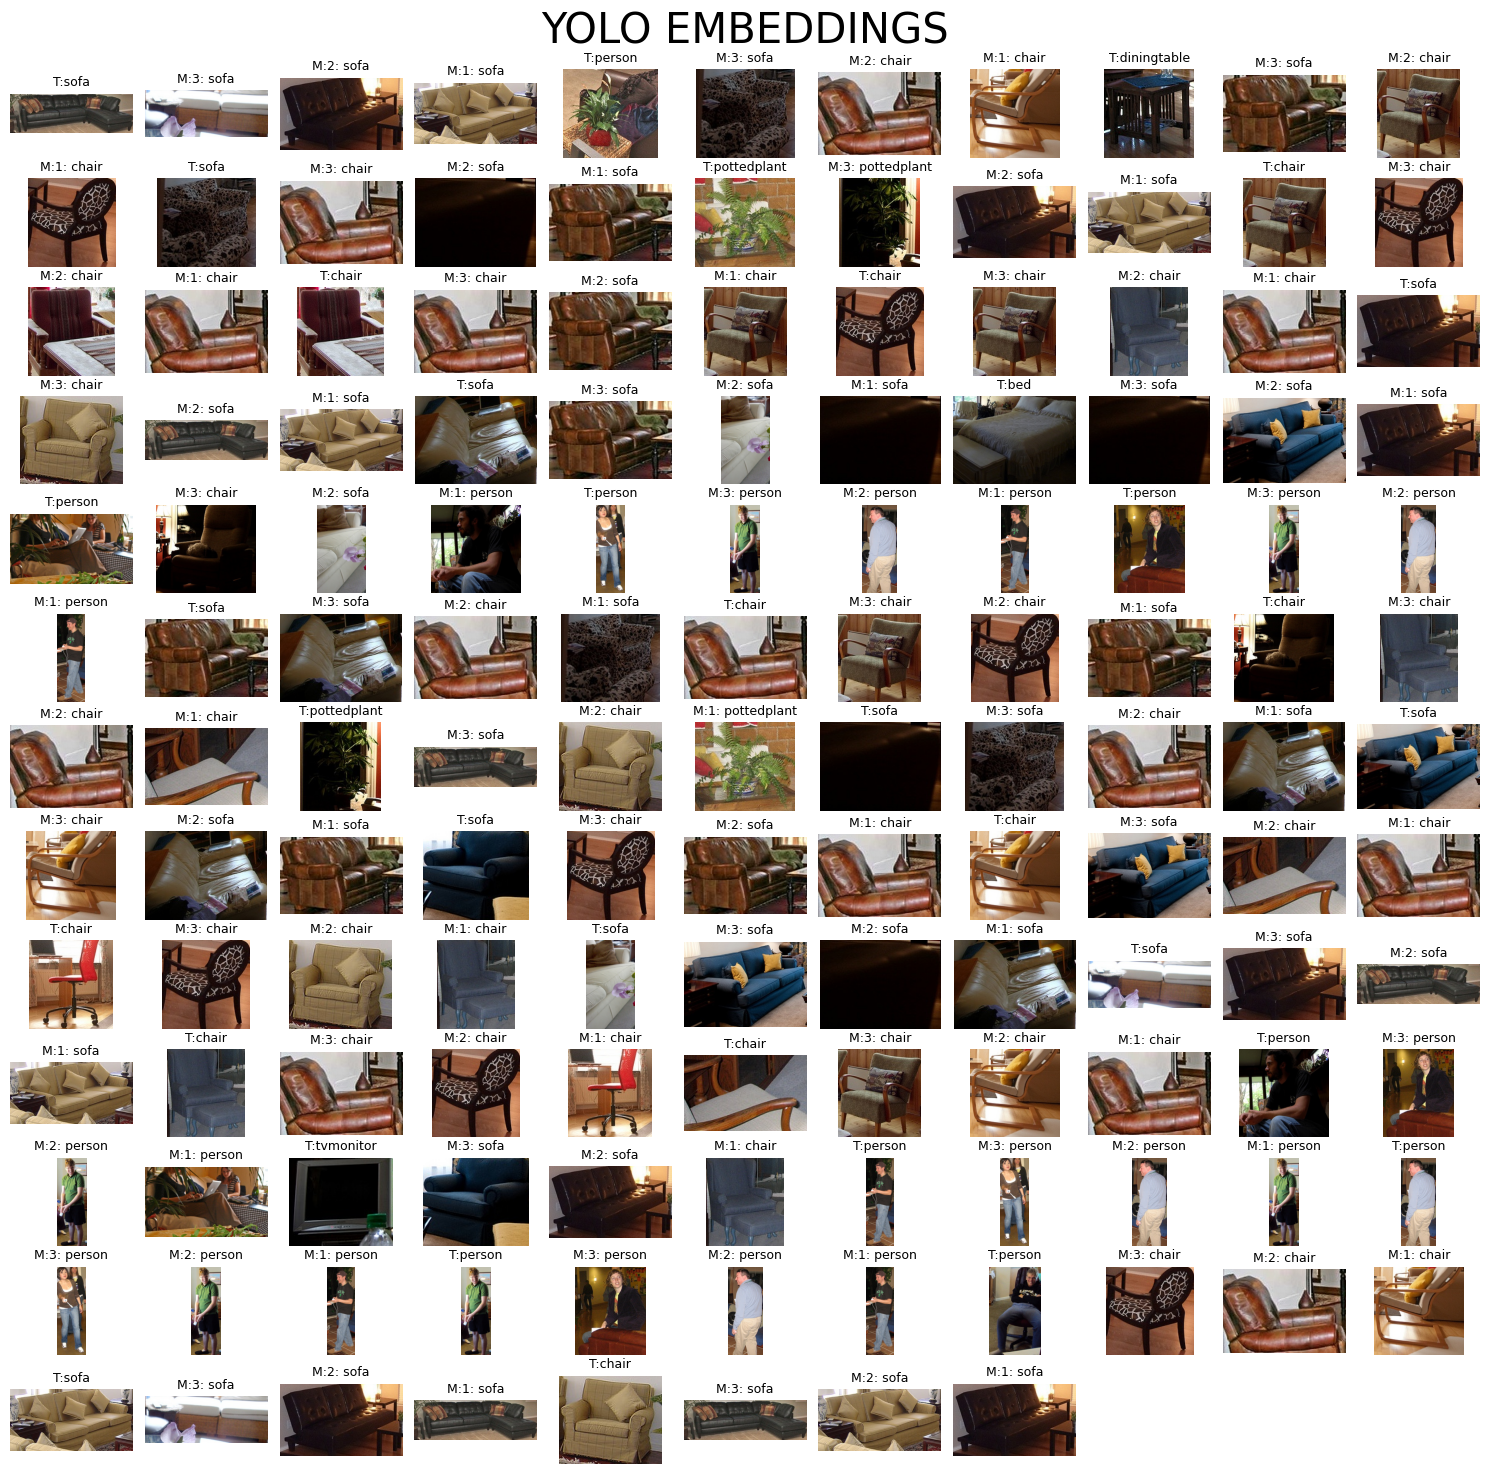

In [2]:
import os
import uuid
import numpy as np

from utils.data_utils import load_object_from_file
from utils.viz_utils import concise_ims_and_plots, plot_neighbours
from utils.distance_utils import get_k_nearest


results_path = "/app/bin/results/"


# embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_2f6dd8bd6b585368b23d5b7e6e065772_yolo.pkl"))
# embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_2f6dd8bd6b585368b23d5b7e6e065772_yolo.pkl"))

#few
# embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_95f788e548755890a7ddd28135ac37e2_yolo_numims_5_embwin_3.pkl"))
# embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_95f788e548755890a7ddd28135ac37e2_yolo_numims_5_embwin_3.pkl"))


# #many
embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_36bd30c588fb5e76bec069b8d0059100_yolo_numims_20_embwin_3.pkl"))
embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_36bd30c588fb5e76bec069b8d0059100_yolo_numims_20_embwin_3.pkl"))

neighbours_inds = get_k_nearest(embedding_matrix, embedding_details["class_names"], 3)

plot_neighbours(embedding_details, neighbours_inds, masks_available = False, title = 'YOLO EMBEDDINGS')

In [11]:
for key, value in embedding_details.items():
    print(f"key : {key} value # : {len(value)}")
print(f"embedding matrix details : {embedding_matrix.shape}")

key : bounding_boxes value # : 12
key : confidences value # : 12
key : class_names value # : 12
key : source_paths value # : 12
key : embedding_matrix_path value # : 93
embedding matrix details : (12, 9216)


boxes : [[385.3665  286.03903 524.2553  427.64282]]


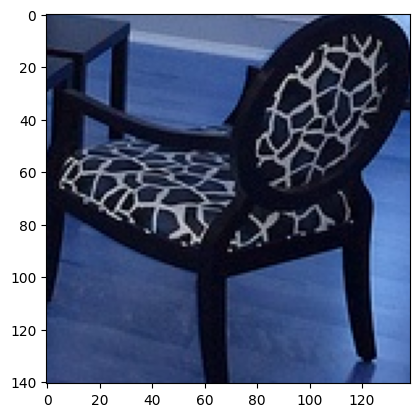

boxes : [[155.627   236.00618 352.54803 352.12186]]


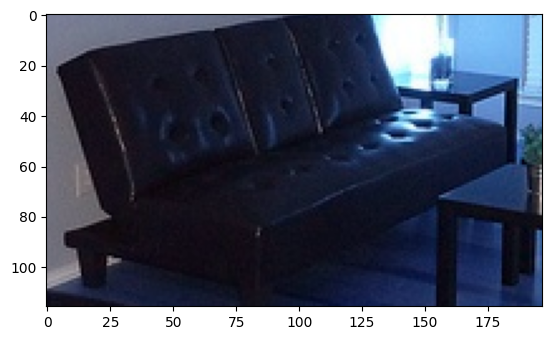

boxes : [[-13.950031 335.88327  320.21387  473.47803 ]]
box NOT WORKING  : (-13, 335, 320, 473) 
boxes : [[  8.050338 282.29752  207.19604  433.70236 ]]


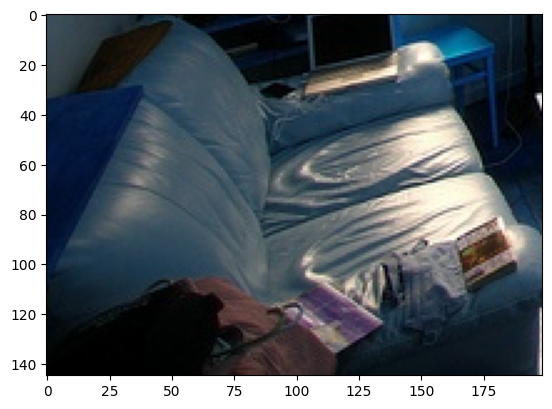

boxes : [[274.91138 197.28207 633.5343  457.9926 ]]


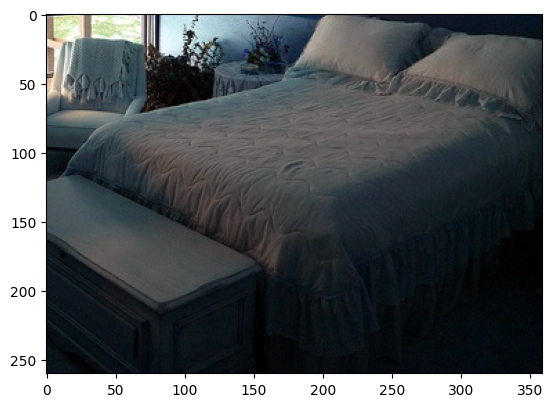

boxes : [[ 62.113834 -39.4106   579.10724  298.414   ]]
box NOT WORKING  : (62, -39, 579, 298) 
boxes : [[343.64764    4.629023 471.7492   130.93945 ]]


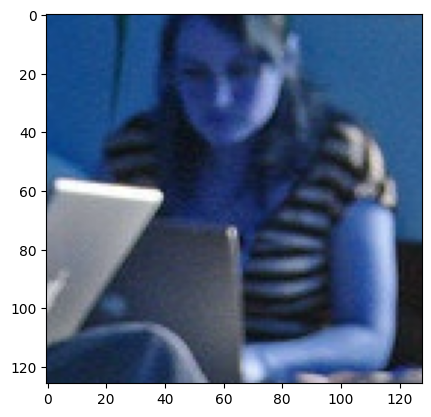

boxes : [[225.09926   61.499847 397.4381   153.34897 ]]


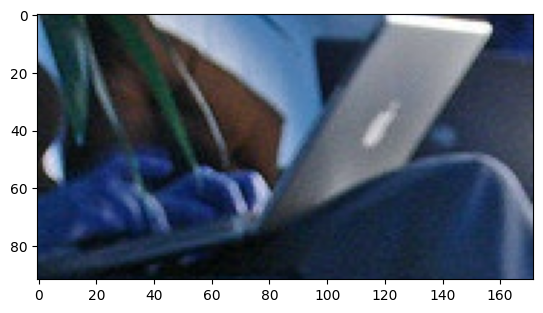

boxes : [[421.7302  133.71835 622.2261  310.55643]]


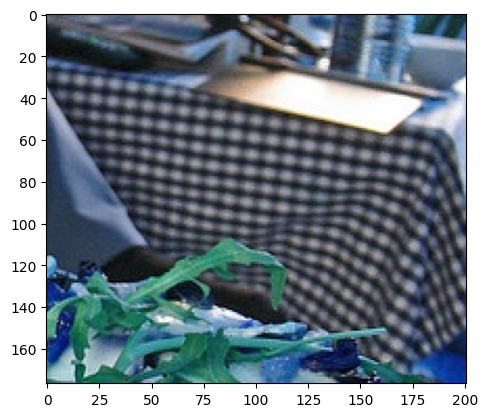

boxes : [[193.42125 105.69135 308.14124 464.10416]]


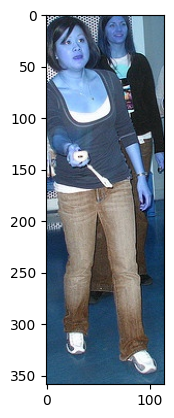

boxes : [[429.2778    75.679756 630.1902   327.1549  ]]


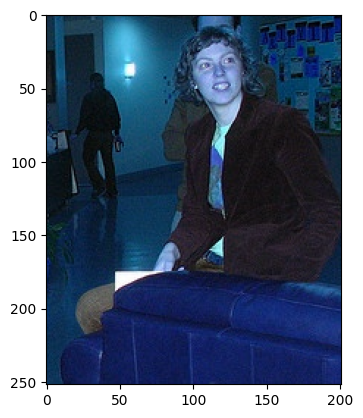

boxes : [[275.7584   102.518074 428.84558  368.0299  ]]


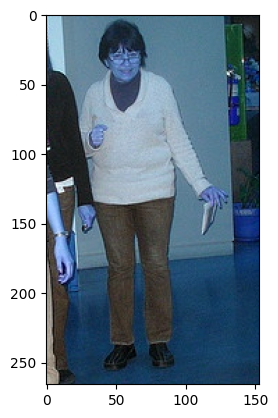

In [27]:
import matplotlib.pyplot as plt
for i, source_path in enumerate(embedding_details['source_paths']):
    img = cv2.imread(source_path)
    print(f"boxes : {embedding_details['bounding_boxes'][i]}")
    xmin, ymin, xmax,ymax = embedding_details['bounding_boxes'][i][0].astype(int)
    try:
        chunk = img[ymin:ymax, xmin:xmax, :]
        plt.imshow(chunk)
        plt.show()
    except:
        print(f"box NOT WORKING  : {xmin, ymin, xmax, ymax} ")


# RESNET EMBEDDINGS

class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane.jpg
object_ind : 0
class name : apple
source path : /app/data/images/embedding_tester/apple_2.jpg
object_ind : 10
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_2.jpg
object_ind : 1
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_3.jpg
object_ind : 2
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_2.jpg
object_ind : 1
class name : apple
source path : /app/data/images/embedding_tester/apple_1.jpeg
object_ind : 3
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane.jpg
object_ind : 0
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_3.jpg
object_ind : 2
class name : aeroplane
source path : /app/data/images/embedding_tester/aeroplane_3.jpg
object_ind : 2
class name : apple
source path : /app/data/images/embedding_tester/apple_1.jpeg
object_ind : 3
class

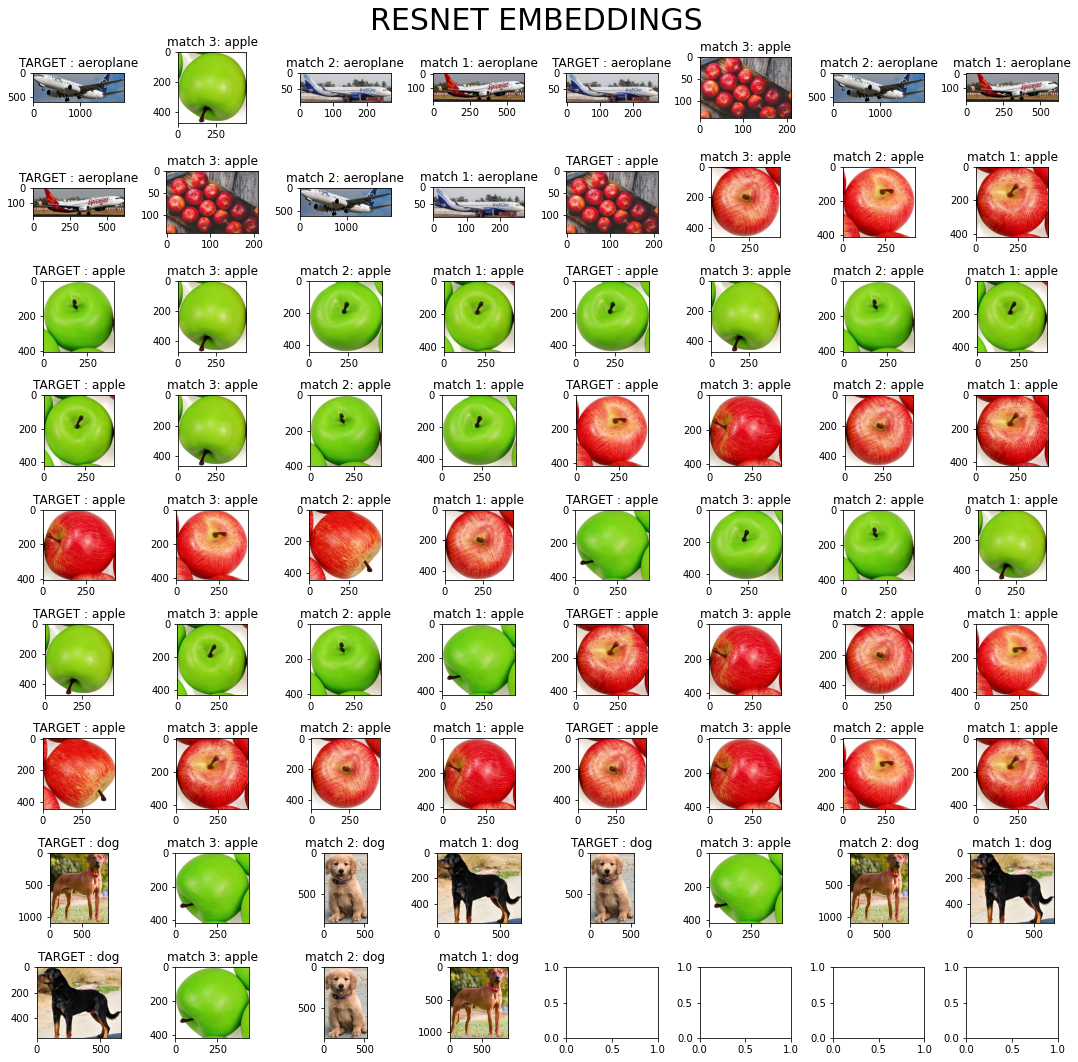

In [2]:
import os
import uuid
import numpy as np

from utils.data_utils import load_object_from_file
from utils.viz_utils import concise_ims_and_plots, plot_neighbours
from utils.distance_utils import get_k_nearest


results_path = "/app/bin/results/"


embedding_matrix = load_object_from_file(os.path.join(results_path,"embedding_matrix_bf0a8f0be08854a59dccf7b0ba0bb93f_gdsr.pkl"))
embedding_details = load_object_from_file(os.path.join(results_path, "embedding_details_bf0a8f0be08854a59dccf7b0ba0bb93f_gdsr.pkl"))

neighbours_inds = get_k_nearest(embedding_matrix, embedding_details["class_names"], 3)

plot_neighbours(embedding_details, neighbours_inds, masks_available = False, title = 'RESNET EMBEDDINGS')



# insights
<ol>
    <li> <b> embeddings capture similarities and differences within samples of a single class</b> : When we a train a neural network on a classification task, like the model used for extracting embeddings here : Resnet 50, we expect that the final layer capture features that only differentiate different classes, i.e, what defines an apple, and more specifically, what differentiates an apple from the other classes on which the model was trained. <br><br>BUT, <b> we see that the model is able to tell the similarity between orientations of an almost identical sample of the same class as well.</b><br><br> For instance , in the first target of the 3rd row, we see that the staw is roughly in the middle of the apple, pointing north-east, and we find the closest 2 matches to be in similar orientations as well, whereas an instance where the stalk is at the bottom left position is considered to be more distant.</li>
    
       